In [4]:
import os
import matplotlib.pyplot as plt
import glob
import numpy as np
import pandas as pd
import math
import warnings
from pandas import ExcelWriter
from pandas import ExcelFile
import sys

In [5]:
#INPUT FILE RUN
#Cambiar al archivo que se quiere usar
warnings.filterwarnings('ignore')
#input_file='Inputdata_Lectura.ipynb'
input_file='Inputdata_TMTA.ipynb'

#Obtiene directorio actual
cwd = os.getcwd()
#Busca directorio arriba
here=os.path.dirname(cwd)
#Arma el directorio donde están los inputs
inputs=os.path.join(here,'INPUTS')
#Arma el camino al archivo
inputs=os.path.join(inputs,input_file)

print('\033[91m' + 'Archivo Input:' + '\033[0m' + inputs)

%run $inputs

Archivo Input:C:\Ana\Python\Codigos\INPUTS\Inputdata_TMTA.ipynb


Cantidad de archivos que encontró: 26
Nombres de los archivos: ['C:\\Ana\\Python\\Resultados\\TMT\\DatosProcesados\\fix-IVTNH_TMTA_h20_485_310718.csv', 'C:\\Ana\\Python\\Resultados\\TMT\\DatosProcesados\\fix-IVTNH_TMTA_h21_087_190718.csv', 'C:\\Ana\\Python\\Resultados\\TMT\\DatosProcesados\\fix-IVTNH_TMTA_h21_184_060718.csv', 'C:\\Ana\\Python\\Resultados\\TMT\\DatosProcesados\\fix-IVTNH_TMTA_h21_382_160718.csv', 'C:\\Ana\\Python\\Resultados\\TMT\\DatosProcesados\\fix-IVTNH_TMTA_h21_455_030718.csv', 'C:\\Ana\\Python\\Resultados\\TMT\\DatosProcesados\\fix-IVTNH_TMTA_h21_685_160718.csv', 'C:\\Ana\\Python\\Resultados\\TMT\\DatosProcesados\\fix-IVTNH_TMTA_h21_689_160718.csv', 'C:\\Ana\\Python\\Resultados\\TMT\\DatosProcesados\\fix-IVTNH_TMTA_h21_939_050718.csv', 'C:\\Ana\\Python\\Resultados\\TMT\\DatosProcesados\\fix-IVTNH_TMTA_h22_951_310718.csv', 'C:\\Ana\\Python\\Resultados\\TMT\\DatosProcesados\\fix-IVTNH_TMTA_h24_371_060718.csv', 'C:\\Ana\\Python\\Resultados\\TMT\\DatosProcesados\\fix-

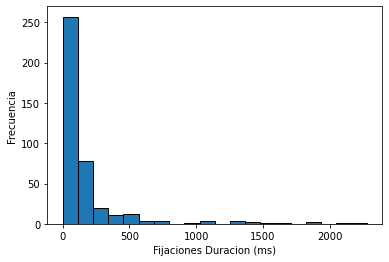

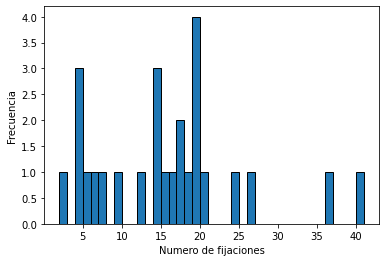

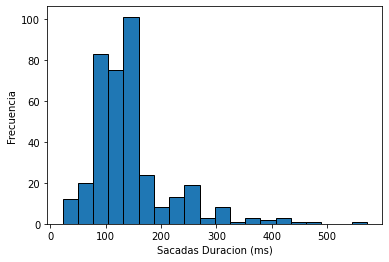

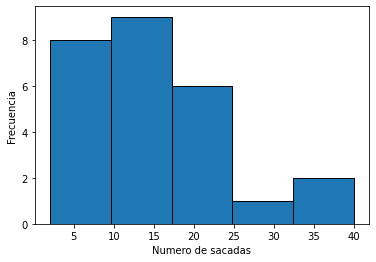

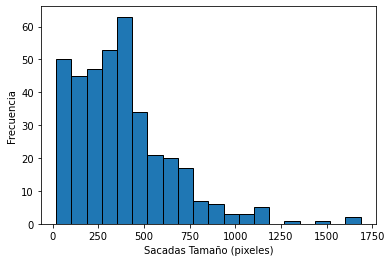

<Figure size 432x288 with 0 Axes>

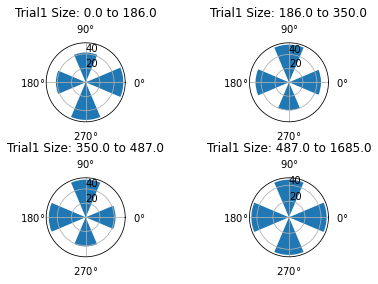

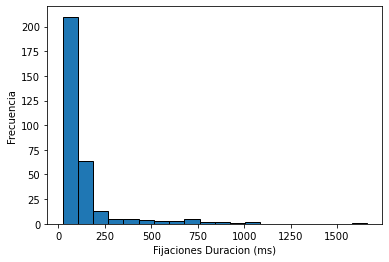

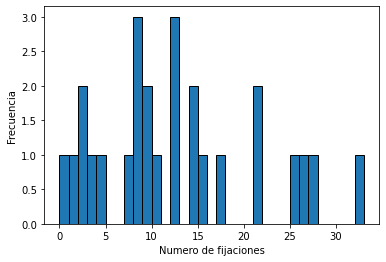

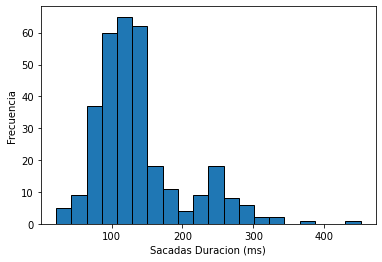

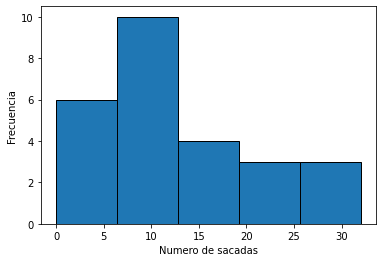

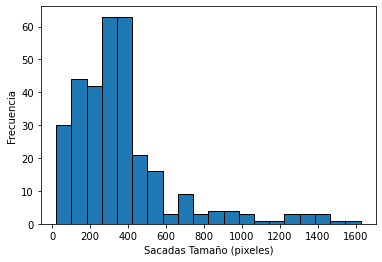

<Figure size 432x288 with 0 Axes>

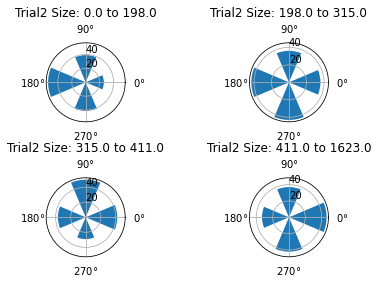

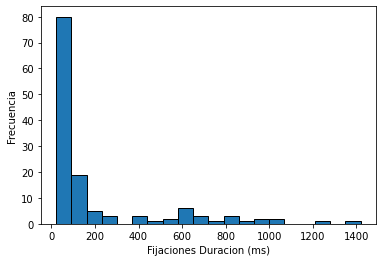

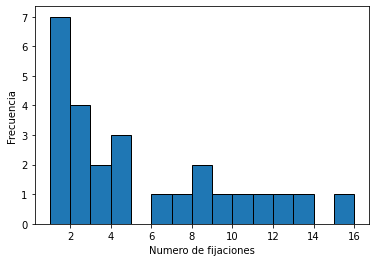

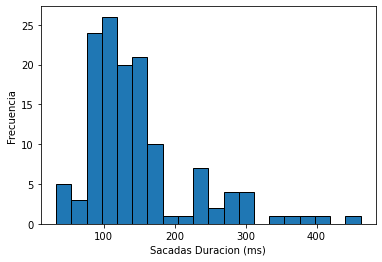

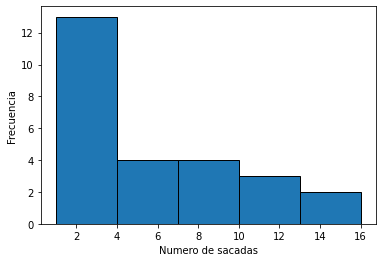

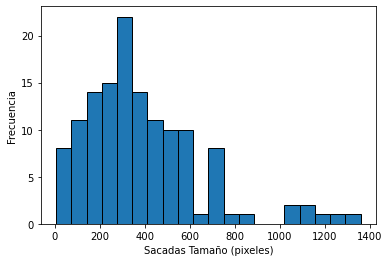

<Figure size 432x288 with 0 Axes>

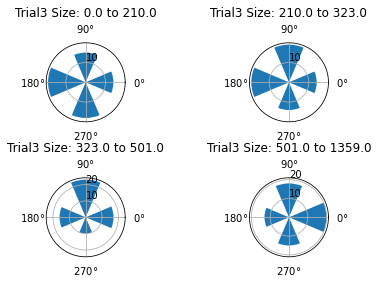

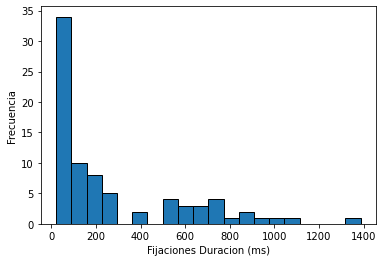

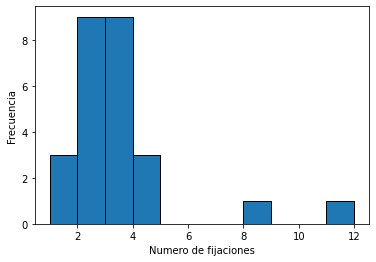

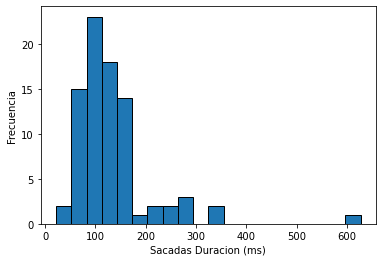

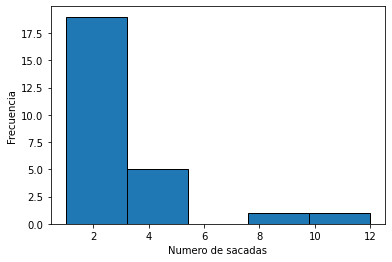

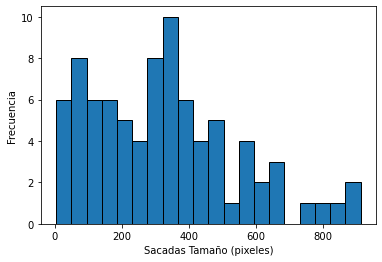

<Figure size 432x288 with 0 Axes>

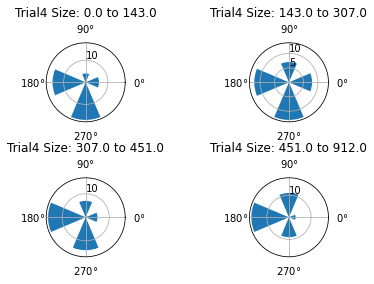

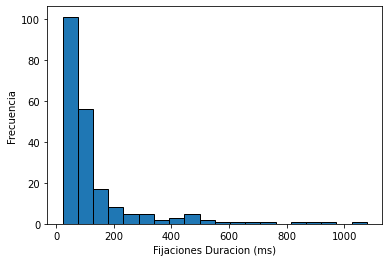

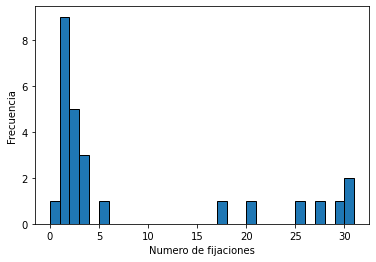

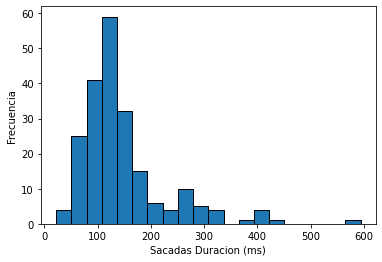

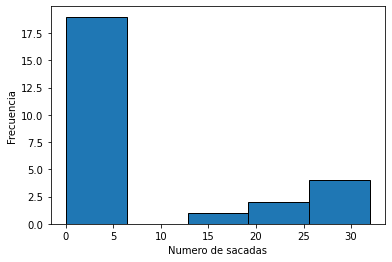

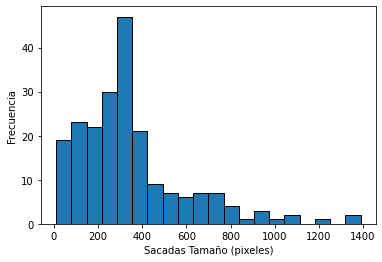

<Figure size 432x288 with 0 Axes>

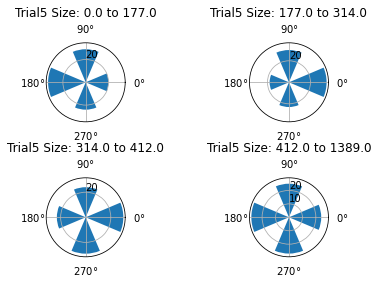

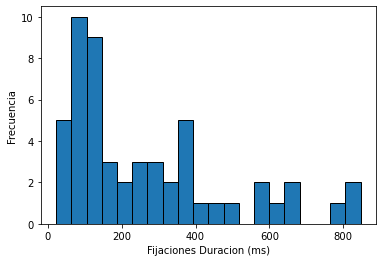

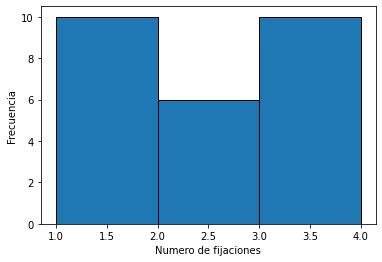

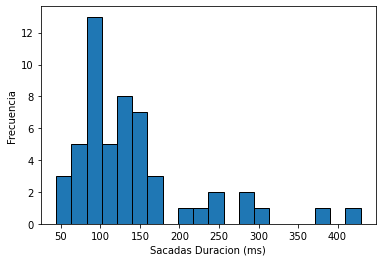

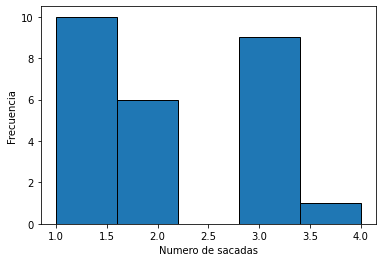

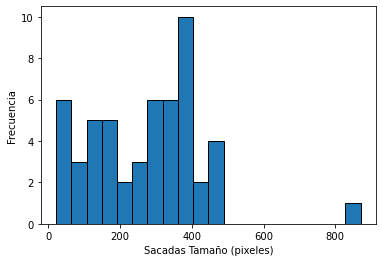

<Figure size 432x288 with 0 Axes>

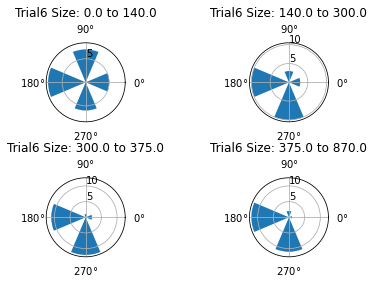

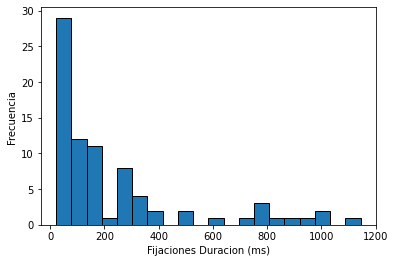

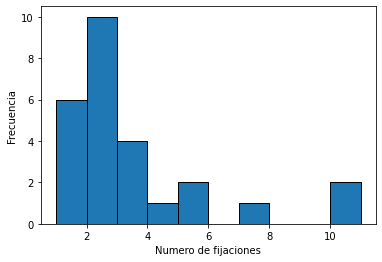

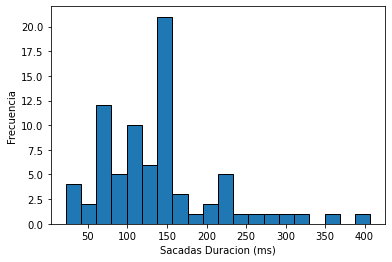

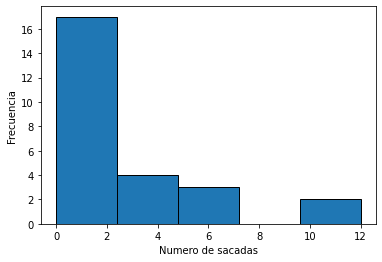

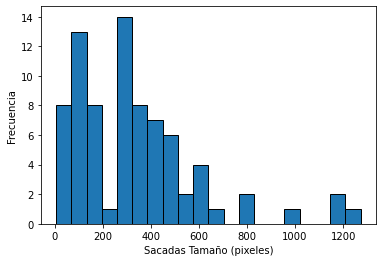

<Figure size 432x288 with 0 Axes>

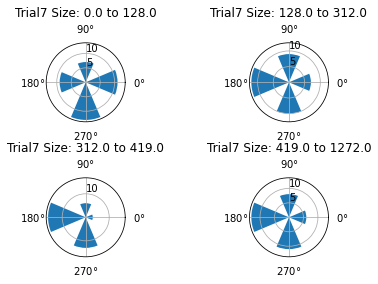

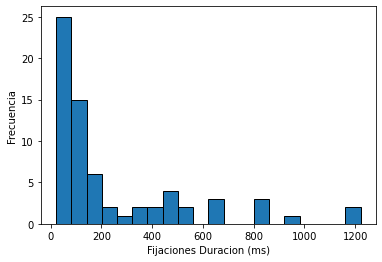

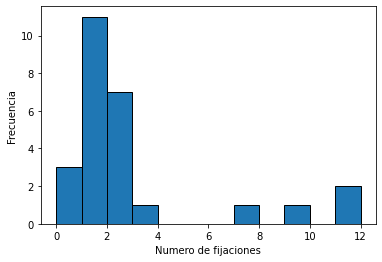

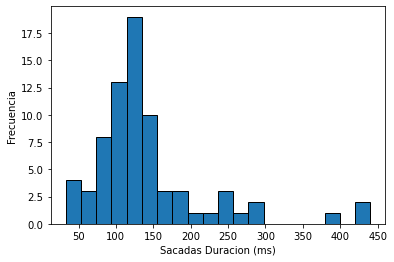

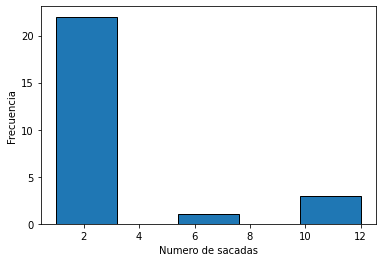

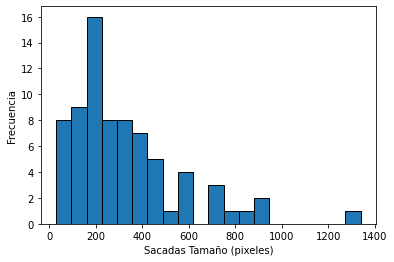

<Figure size 432x288 with 0 Axes>

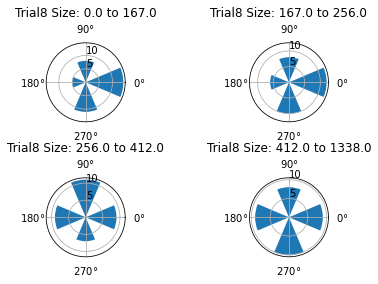

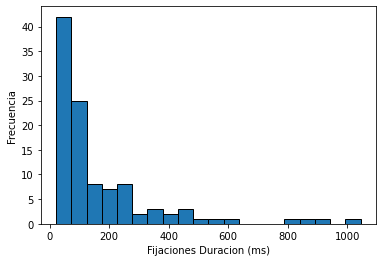

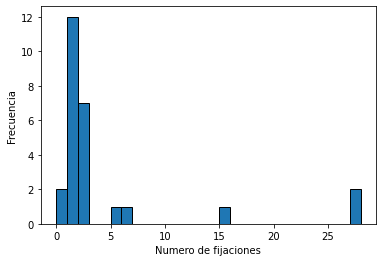

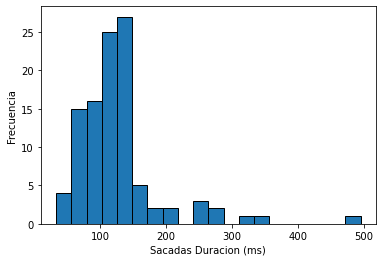

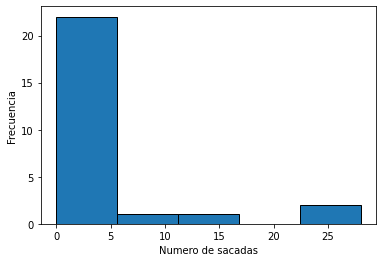

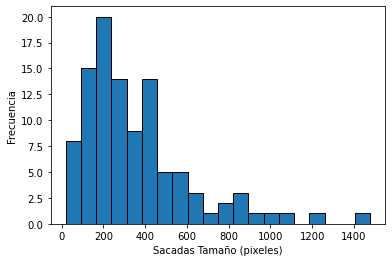

<Figure size 432x288 with 0 Axes>

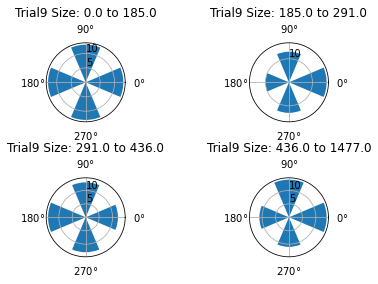

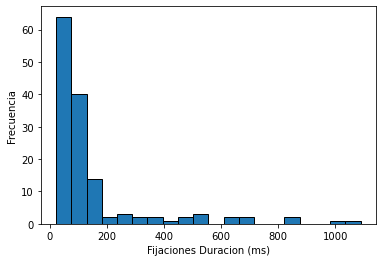

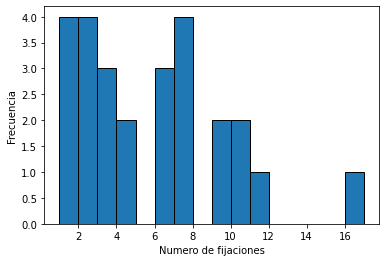

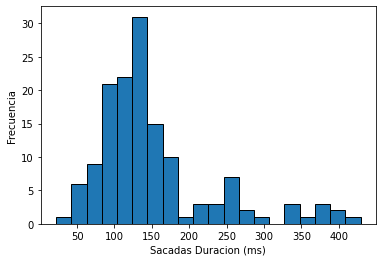

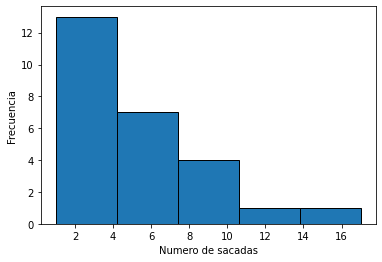

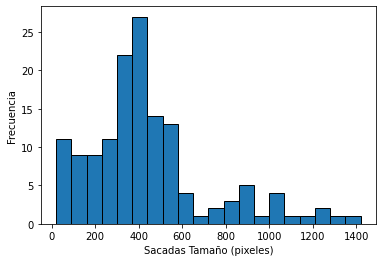

<Figure size 432x288 with 0 Axes>

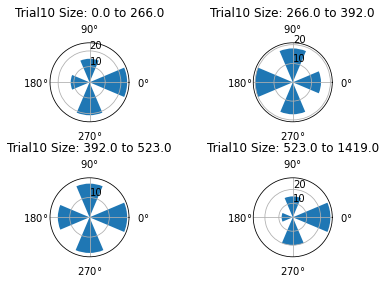

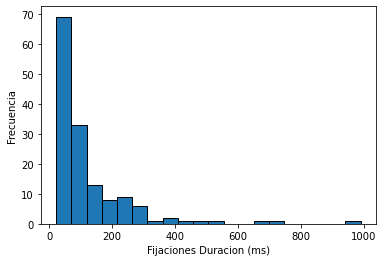

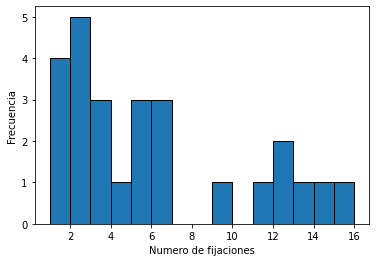

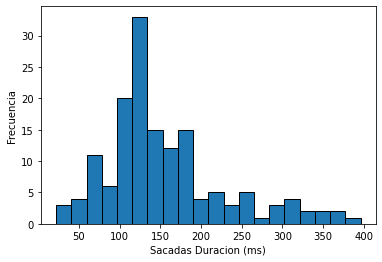

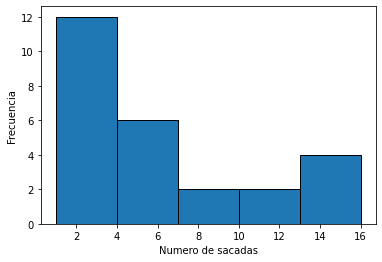

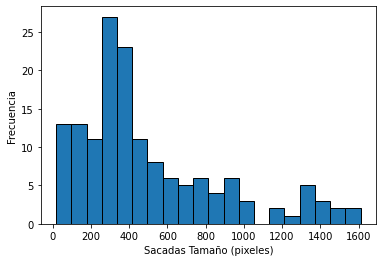

<Figure size 432x288 with 0 Axes>

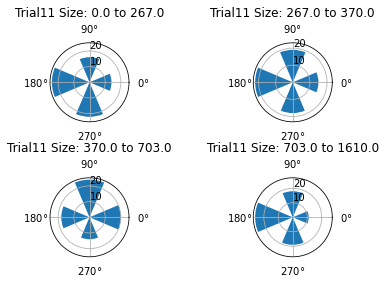

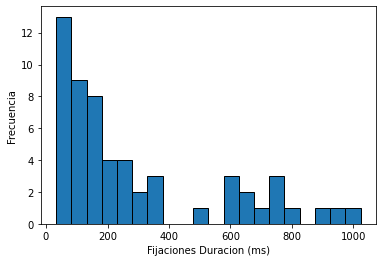

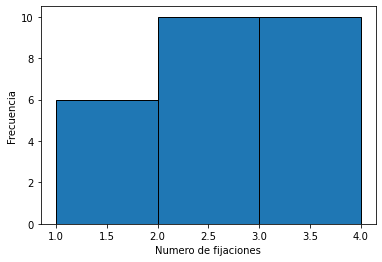

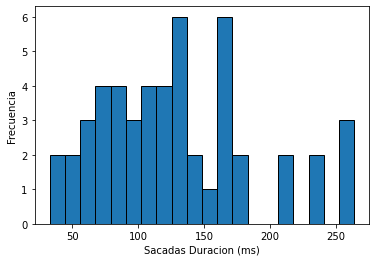

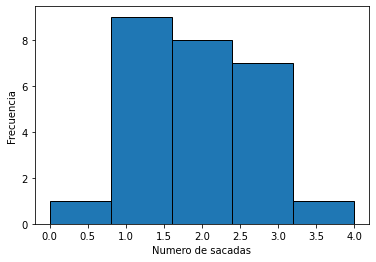

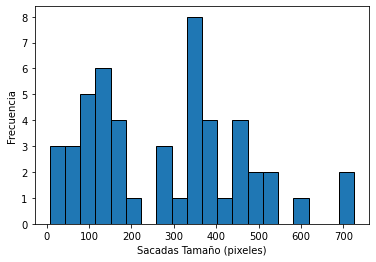

<Figure size 432x288 with 0 Axes>

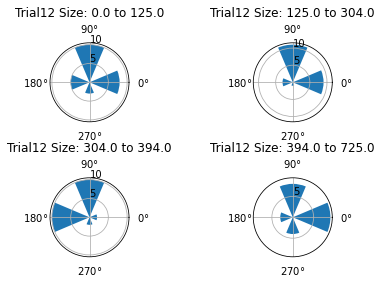

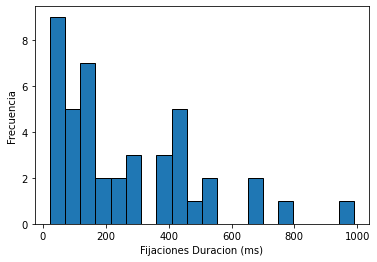

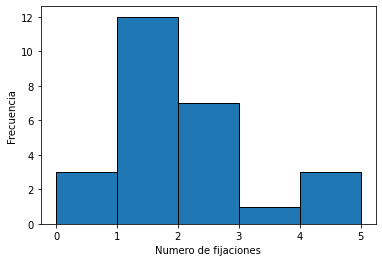

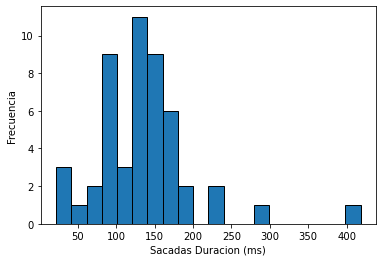

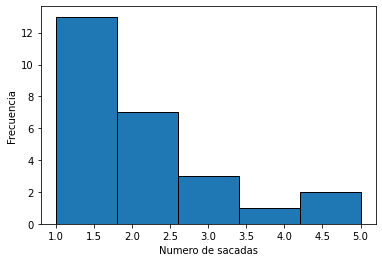

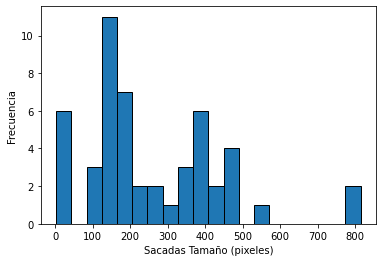

<Figure size 432x288 with 0 Axes>

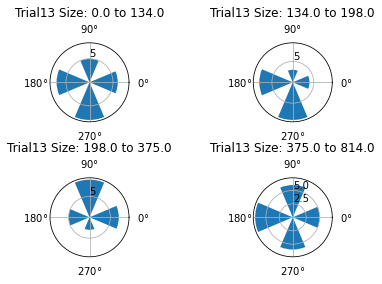

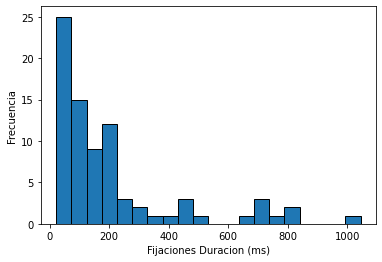

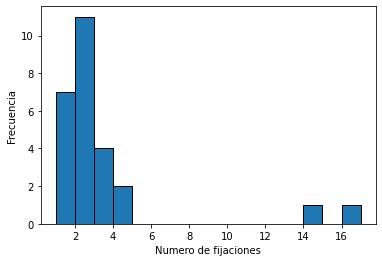

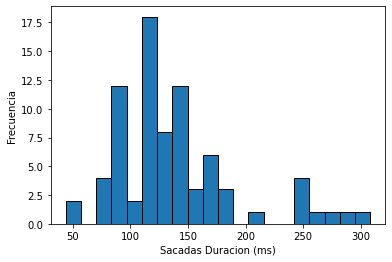

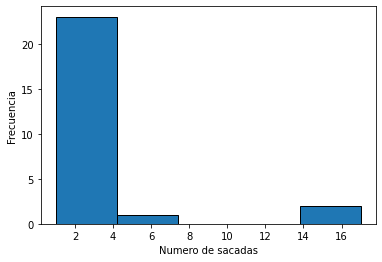

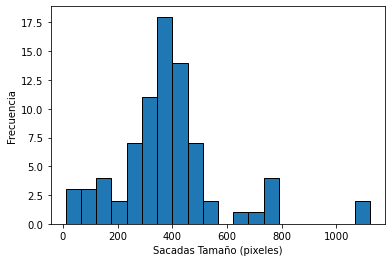

<Figure size 432x288 with 0 Axes>

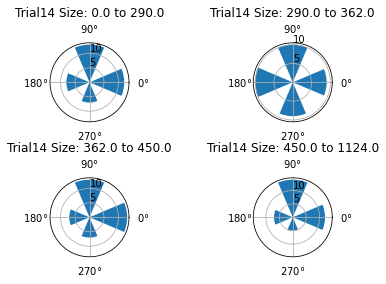

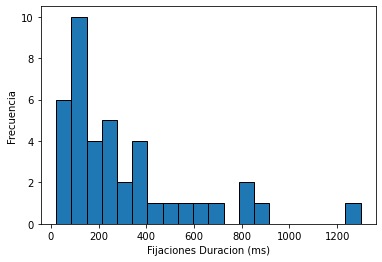

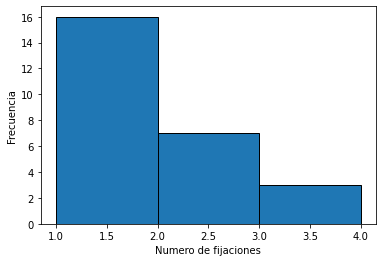

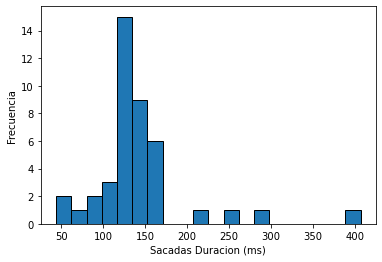

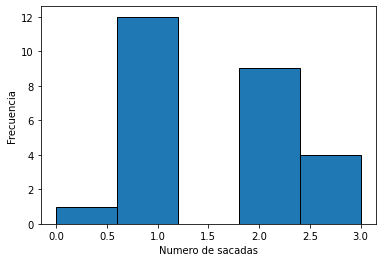

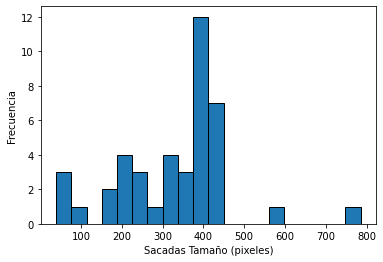

<Figure size 432x288 with 0 Axes>

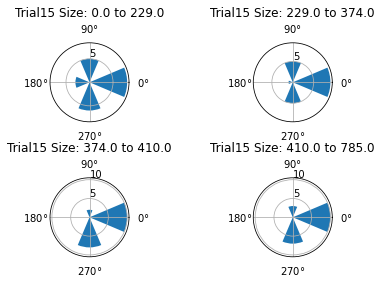

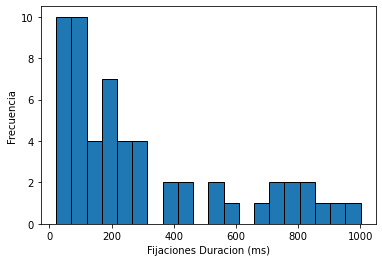

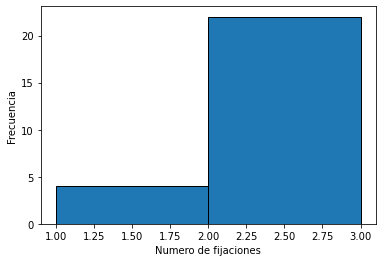

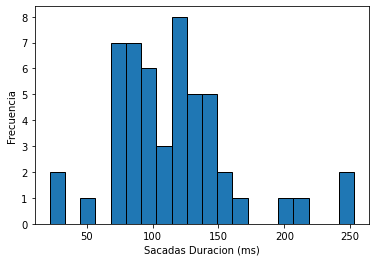

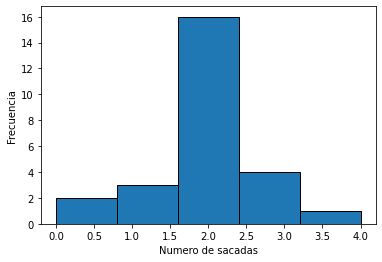

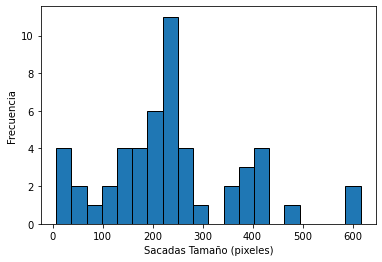

<Figure size 432x288 with 0 Axes>

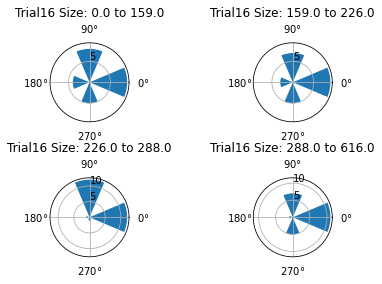

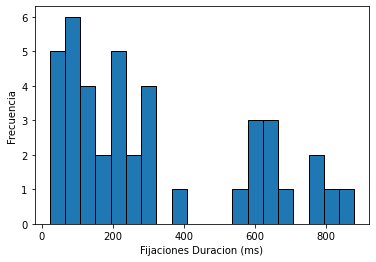

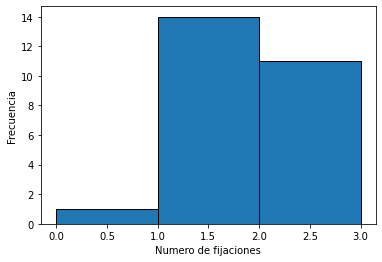

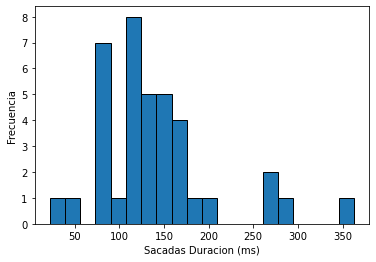

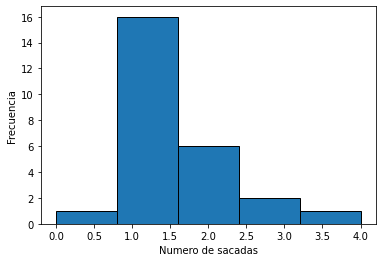

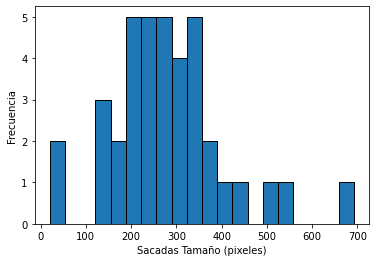

<Figure size 432x288 with 0 Axes>

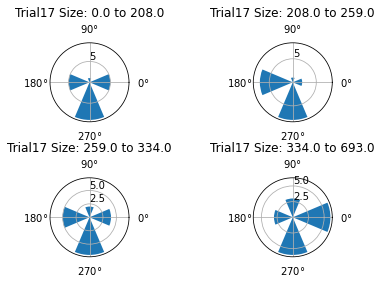

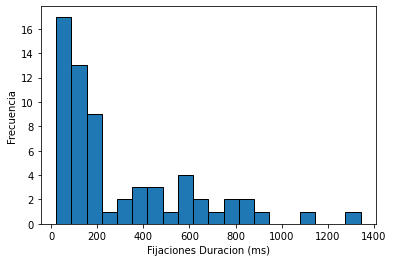

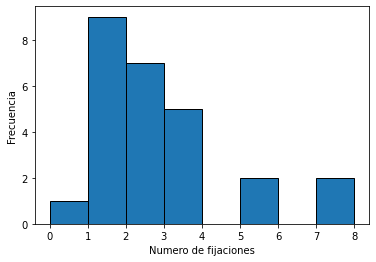

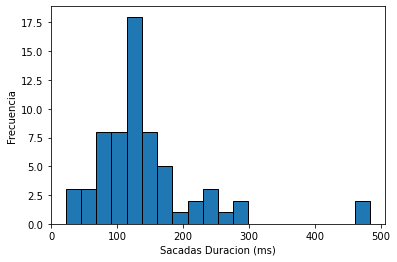

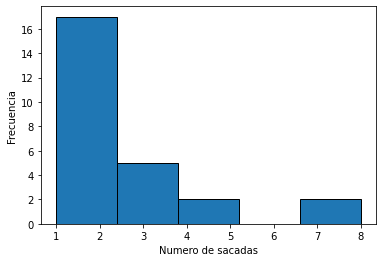

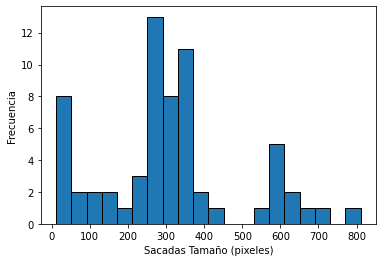

<Figure size 432x288 with 0 Axes>

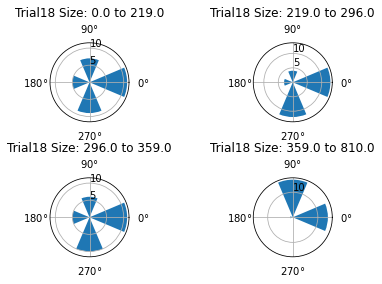

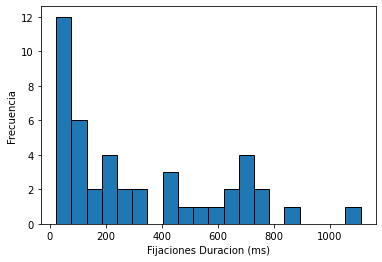

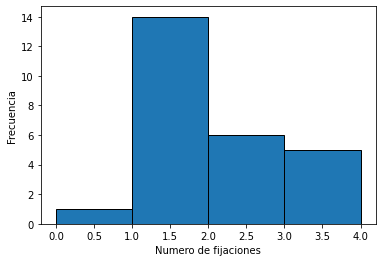

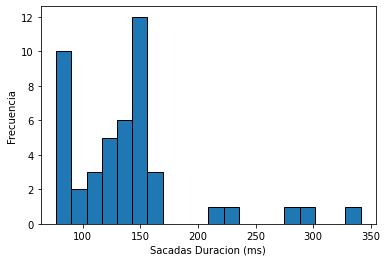

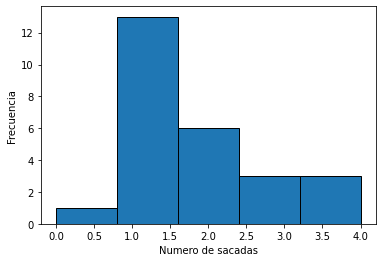

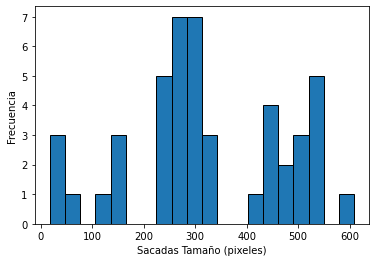

<Figure size 432x288 with 0 Axes>

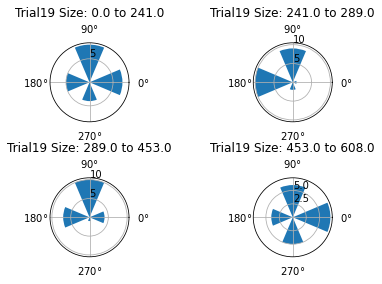

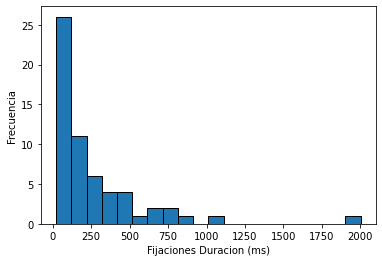

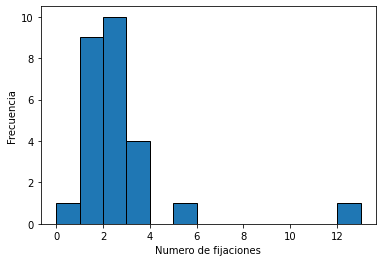

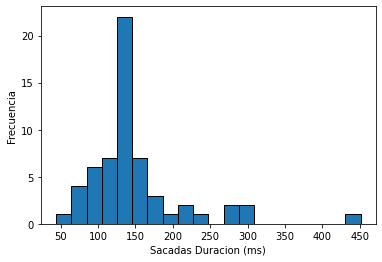

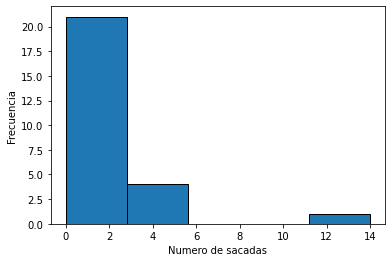

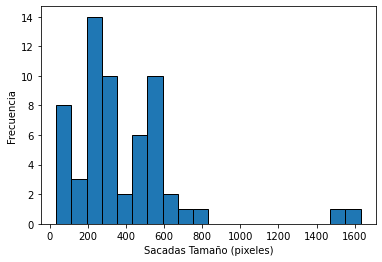

<Figure size 432x288 with 0 Axes>

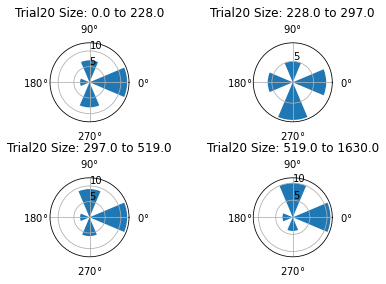

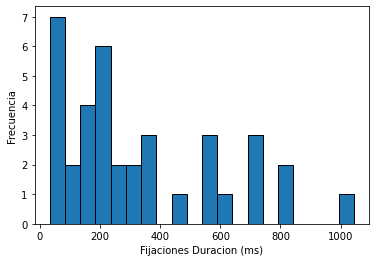

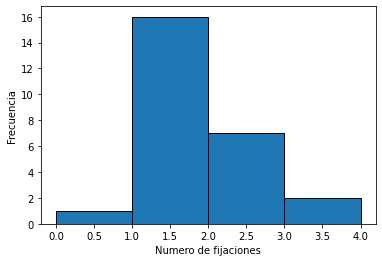

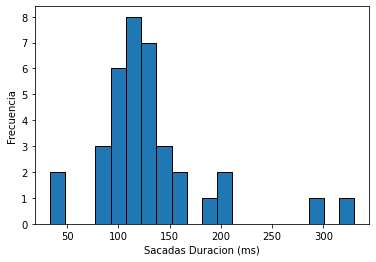

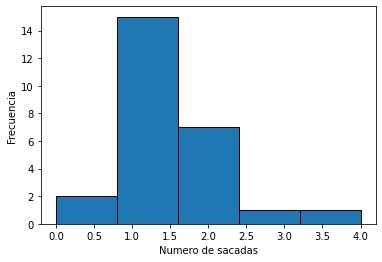

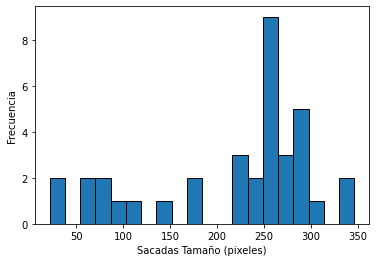

<Figure size 432x288 with 0 Axes>

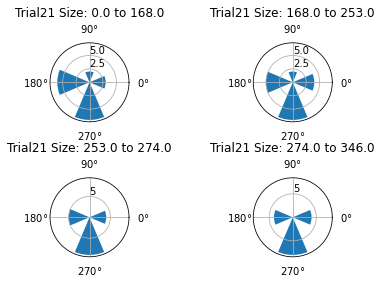

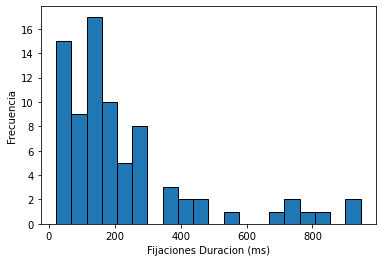

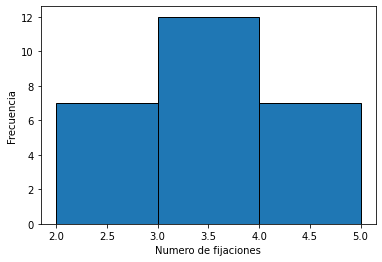

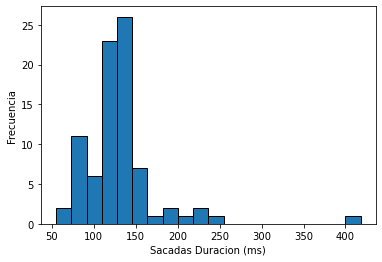

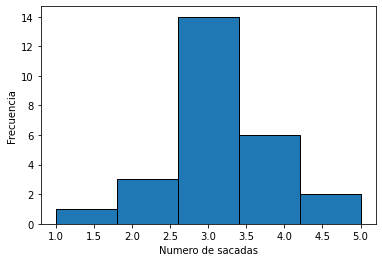

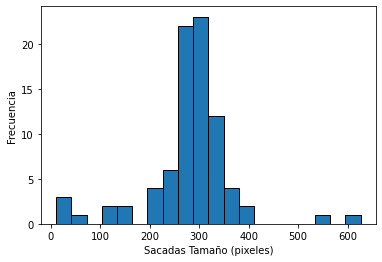

<Figure size 432x288 with 0 Axes>

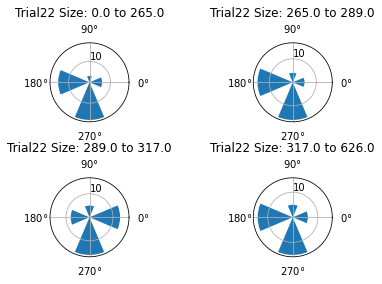

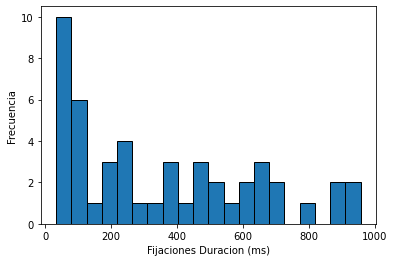

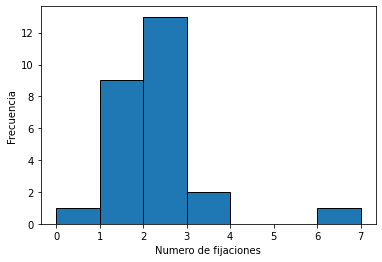

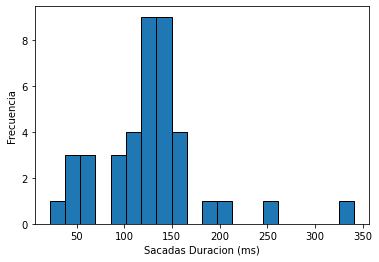

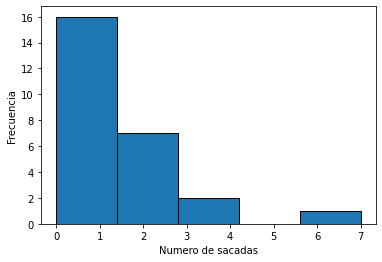

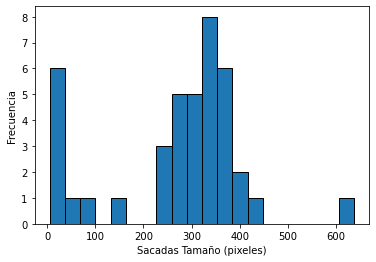

<Figure size 432x288 with 0 Axes>

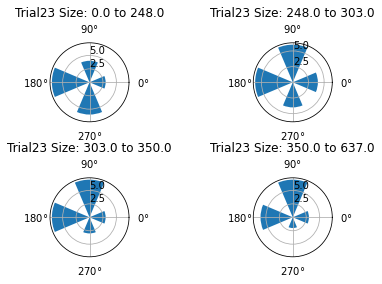

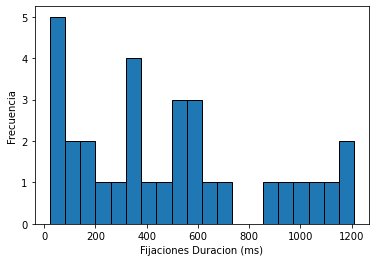

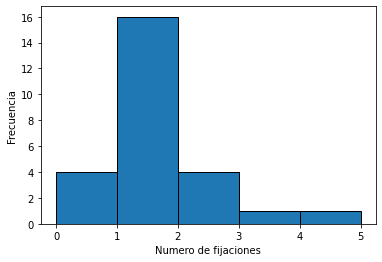

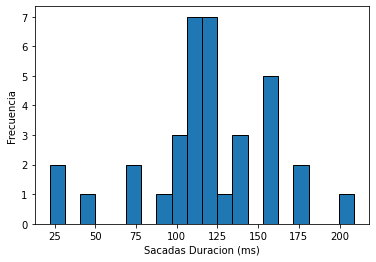

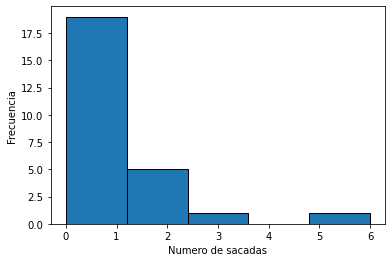

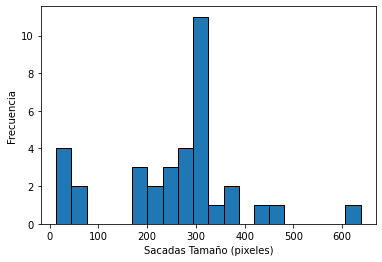

<Figure size 432x288 with 0 Axes>

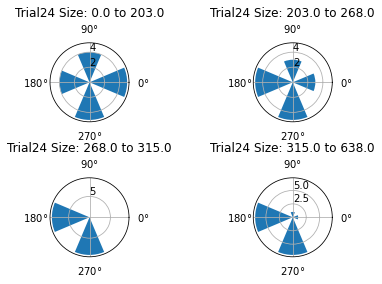

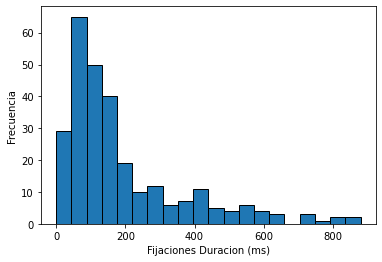

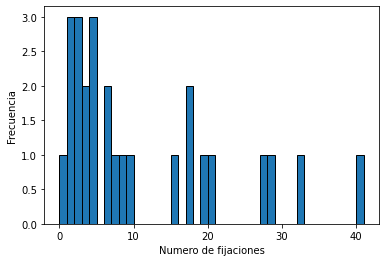

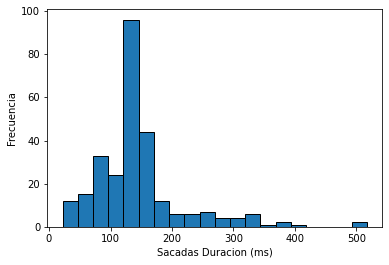

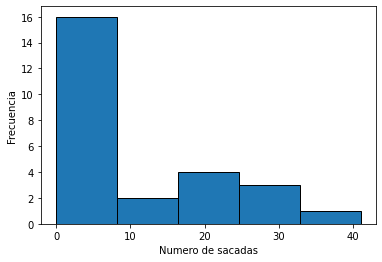

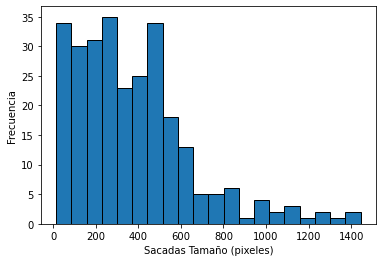

<Figure size 432x288 with 0 Axes>

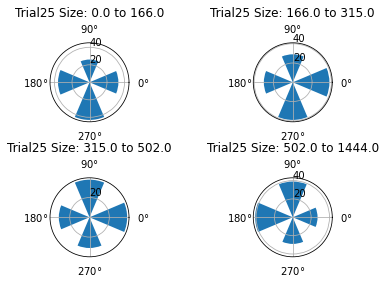

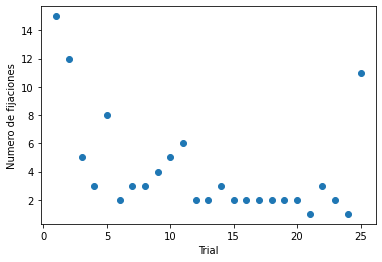

In [19]:
files1=glob.glob(directory_out + 'fix-*.csv')
files2=glob.glob(directory_out + 'sacadas*.csv')
files3=glob.glob(directory_out + 'datos-*.csv')

kmax=len(files1)
print('\033[91m' + 'Cantidad de archivos que encontró:' + '\033[0m',kmax)
print('\033[91m' + 'Nombres de los archivos:' + '\033[0m',files1)

fix1=pd.read_csv(files1[0])
ntot_trials=fix1["trial"].iloc[-1]
del fix1

averages = np.zeros(ntot_trials,dtype={"names":('trial','nfix','desv_fix','dur_fix','nsac','desv_sac','dur_sac','size_sac','dur_trial'),'formats':('float','float','float','float','float','float','float','int','int','int')})

for nt in range(ntot_trials):
    ntrial=nt+1
    
    print('\033[91m' + 'Construyendo Graficos para Trial:' + '\033[0m',ntrial)
    
    dur_fix=np.array([],dtype=float)
    num_fix=np.array([],dtype=int)
    dur_sac=np.array([],dtype=float)
    size_sac=np.array([],dtype=float)
    num_sac=np.array([],dtype=int)
    dur_trial=np.array([],dtype=float)
    ang_x=np.array([],dtype=float)
    ang_y=np.array([],dtype=float)
    
    k=0
    for file in files1:
        filename_in=file
            
        fix=pd.read_csv(filename_in)
        fix.reset_index(drop=True)
        
        sacadas=pd.read_csv(files2[k])
    
        dur=fix["duration"][fix["trial"]==ntrial]
        dur1=sacadas["duration"][sacadas["trial"]==ntrial]
        dur_fix=np.append(dur_fix,fix["duration"][fix["trial"]==ntrial])
        nfix=dur.shape[0]
        num_fix=np.append(num_fix,nfix)
        nsac=dur1.shape[0]
        dur_sac=np.append(dur_sac,sacadas["duration"][sacadas["trial"]==ntrial])
        size_sac=np.append(size_sac,sacadas["sizep"][sacadas["trial"]==ntrial])
        num_sac=np.append(num_sac,nsac)
        
        data=pd.read_csv(files3[k])
        
        #Trials from data
        indxs=np.array(np.where(data["trial"]==ntrial))
        indxs=np.squeeze(indxs,0)
        dur_trial=np.append(dur_trial,data["t"][indxs[-1]]-data["t"][indxs[0]])
        
        onset=np.asarray(sacadas["onset"][sacadas["trial"]==ntrial])
        offset=np.asarray(sacadas["offset"][sacadas["trial"]==ntrial])
        dirx=np.asarray(data["xp"][offset])-np.asarray(data["xp"][onset])
        diry=-np.asarray(data["yp"][offset])+np.asarray(data["yp"][onset])
        new_dirx = [180 if x < 0 else 0 for x in dirx]
        new_diry = [270 if x < 0 else 90 for x in diry]
        ang_x=np.append(ang_x,np.asarray(new_dirx))
        ang_y=np.append(ang_y,np.asarray(new_diry))
        
        k=k+1
        if k==kmax:
            break

    plt.figure()
    plt.hist(dur_fix,bins=20,histtype='bar', ec='black')
    plt.xlabel("Fijaciones Duracion (ms)")
    plt.ylabel("Frecuencia")
    plt.savefig(directory_out + "Histograma_Fixations_Duration_Trial" + str(ntrial) + ".png")
    
    plt.figure()
    nbins=np.max(num_fix)-np.min(num_fix)
    n, bins, patches = plt.hist(num_fix,bins=nbins,histtype='bar', ec='black')
    print(n.max())
    print(bins)
    plt.xlabel("Numero de fijaciones")
    plt.ylabel("Frecuencia")
    plt.savefig(directory_out + "Histograma_Fixations_number_Trial" + str(ntrial) + ".png")
    
    plt.figure()
    plt.hist(dur_sac,bins=20,histtype='bar', ec='black')
    plt.xlabel("Sacadas Duracion (ms)")
    plt.ylabel("Frecuencia")
    plt.savefig(directory_out + "Histograma_Saccades_Duration_Trial" + str(ntrial) + ".png")
    
    plt.figure()
    plt.hist(num_sac,bins=5,histtype='bar', ec='black')
    plt.xlabel("Numero de sacadas")
    plt.ylabel("Frecuencia")
    plt.savefig(directory_out + "Histograma_Saccades_number_Trial" + str(ntrial) + ".png")
    
    plt.figure()
    plt.hist(size_sac,bins=20,histtype='bar', ec='black')
    plt.xlabel("Sacadas Tamaño (pixeles)")
    plt.ylabel("Frecuencia")
    plt.savefig(directory_out + "Histograma_Saccades_Size_Trial" + str(ntrial) + ".png")
    
    averages["trial"][ntrial-1]=ntrial
    averages["nfix"][ntrial-1]=np.round(np.mean(num_fix),0)
    averages["desv_fix"][ntrial-1]=np.round(np.std(num_fix )/np.sqrt(np.sum(num_fix)),3)
    averages["dur_fix"][ntrial-1]=np.round(np.mean(dur_fix),0)
    averages["nsac"][ntrial-1]=np.round(np.mean(num_sac),0)
    averages["desv_sac"][ntrial-1]=np.round(np.std(num_sac)/np.sqrt(np.sum(num_sac)),3)
    averages["dur_sac"][ntrial-1]=np.round(np.mean(dur_sac),0)
    averages["size_sac"][ntrial-1]=np.round(np.mean(size_sac),0)
    averages["dur_trial"][ntrial-1]=np.round(np.mean(dur_trial),0)
    
    q=np.zeros(5,dtype=float)
    q[0]=0
    q[1]=np.percentile(size_sac, 25)
    q[2]=np.percentile(size_sac, 50)
    q[3]=np.percentile(size_sac, 75)
    q[4]=np.percentile(size_sac, 100)
    plt.figure()
    fig, ax = plt.subplots(2, 2, subplot_kw=dict(projection='polar'))
    fig.tight_layout(pad=1.8)
    for i in range(4):
        indx=np.asarray(np.where((q[i] <= size_sac) & (q[i+1]> size_sac)))     
        # Construct figure and axis to plot on
        if i==0:
            i1=0
            i2=0
        if i==1:
            i1=0
            i2=1
        if i==2:
            i1=1
            i2=0
        if i==3:
            i1=1
            i2=1

        # bin data for our polar histogram
        bins=np.arange(0,365,90)
        bins=bins*math.pi/180
        count, bin = np.histogram(ang_x[indx][0]*math.pi/180,bins=bins)
        count1, bin1 = np.histogram(ang_y[indx][0]*math.pi/180,bins=bins)
        # Plot polar histogram
        ax[i1,i2].bar(bin[:-1], count, align='center', color='C0')
        ax[i1,i2].bar(bin1[:-1], count1,align='center',color='C0')

        # Fiddle with labels and limits
        ax[i1,i2].set_xticks(bins[:-1]) 
        ax[i1,i2].set_title('Trial' + str(ntrial) + ' Size: ' + str(np.round(q[i],0)) + ' to ' + str(np.round(q[i+1],0)))
        ax[i1,i2].set_xticklabels([r'$0°$', r'$90°$', r'$180°$',r'$270°$'])
        ax[i1,i2].set_rlabel_position(90)

    plt.savefig(directory_out + "Histograma_Saccades_Dir_Trial" + str(ntrial) + ".png")
        

#print(averages)
averages_frame=pd.DataFrame(averages)
file_out=os.path.join(directory_out, "averages.csv")
averages_frame.to_csv (file_out,  header=True, index=False)

plt.figure()
plt.scatter(averages["trial"],averages["nfix"])
plt.xlabel("Trial")
plt.ylabel("Numero de fijaciones")
plt.savefig(directory_out + "Trial_vs_nroFijaciones.png")